<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/ai%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B03_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 분류 CNN 모델 - 데이터 전 처리
신경망을 이용한 학습을 시작할 때 대부분 MNIST를 접하게 됩니다. MNIST는 손글씨로 된 사진을 모아 둔 데이터입니다.
손으로 쓴 0부터 9까지의 글자들이 있고, 이 데이터를 사용해서 신경망을 학습시키고, 학습 결과가 손글씨를 인식할 수 있는지 검증합니다.

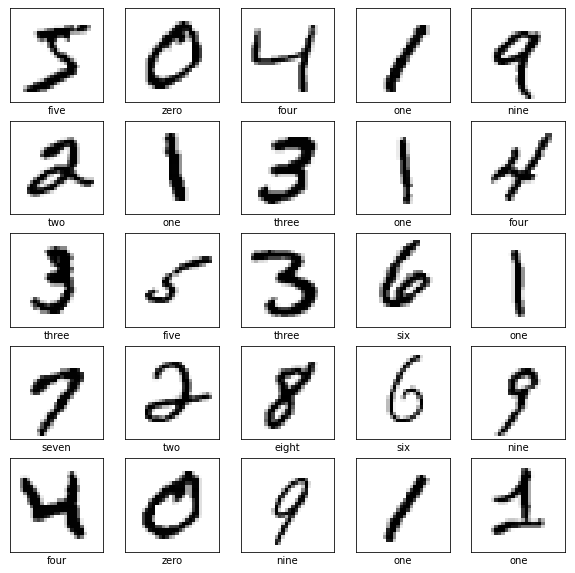

이번 실습에서는 우선 이미지 데이터를 출력하고 그 형태를 확인하여 CNN 모델에 적용할 수 있도록 데이터 전 처리를 수행합니다.

---

CNN을 위한 **데이터** 전처리

MNIST 데이터는 이미지 데이터이지만 가로 길이와 세로 길이만 존재하는 2차원 데이터입니다.  
CNN 모델은 채널(RGB 혹은 흑백)까지 고려한 3차원 데이터를 입력으로 받기에 채널 차원을 추가해 데이터의 모양(shape)을 바꿔줍니다. 결과는 아래와 같습니다.

[데이터 수, 가로 길이, 세로 길이]
-> [데이터 수, 가로 길이, 세로 길이, 채널 수]

차원 추가 함수

```
tf.expand_dims(data, axis)
```

: Tensor 배열 데이터에서 마지막 축(axis)에 해당하는 곳에 차원 하나를 추가할 수 있는 코드입니다. ( axis에 -1을 넣으면 어떤 data가 들어오던 마지막 축의 index를 의미합니다.)

# 지시사항
학습용 및 평가용 데이터를 CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
tf.expand_dims 함수를 활용하여 train_images, test_images 데이터의 형태를 변환하고 각각 train_images, test_images에 저장합니다.

11490434/11490434 [==============================] - 0s 0us/step
원본 학습용 이미지 데이터 형태:  (5000, 28, 28)
원본 평가용 이미지 데이터 형태:  (1000, 28, 28)
원본 학습용 label 데이터:  [5 0 4 ... 2 1 2]
변환한 학습용 이미지 데이터 형태:  (5000, 28, 28, 1)
변환한 평가용 이미지 데이터 형태:  (1000, 28, 28, 1)


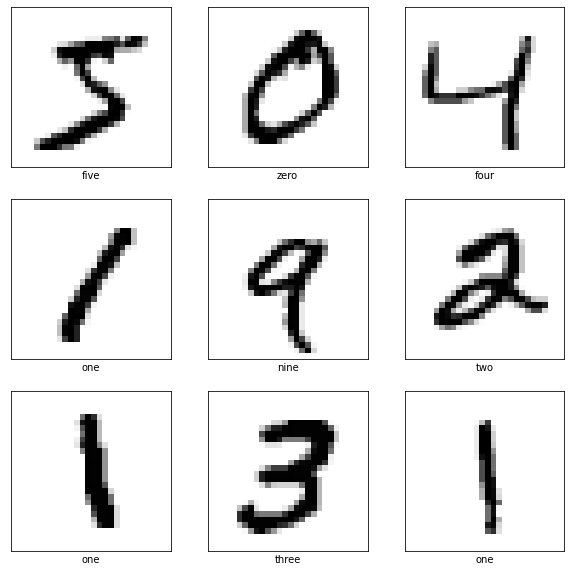

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from elice_utils import EliceUtils

#elice_utils = EliceUtils()

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)


# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]


print("원본 학습용 이미지 데이터 형태: ",train_images.shape)
print("원본 평가용 이미지 데이터 형태: ",test_images.shape)
print("원본 학습용 label 데이터: ",train_labels)

# 첫 번째 샘플 데이터를 출력합니다.
plt.figure(figsize=(10, 10))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title("Training Data Sample")
plt.savefig("sample1.png")
#elice_utils.send_image("sample1.png")

# 9개의 학습용 샘플 데이터를 출력합니다.
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.savefig("sample2.png")
#elice_utils.send_image("sample2.png")

"""
1. CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
"""
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)

print("변환한 학습용 이미지 데이터 형태: ",train_images.shape)
print("변환한 평가용 이미지 데이터 형태: ",test_images.shape)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)


# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
#tensor 형태로 변환되어 있다
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]


print("원본 학습용 이미지 데이터 형태: ",train_images.shape)
print("원본 평가용 이미지 데이터 형태: ",test_images.shape)
print("원본 학습용 label 데이터: ",train_labels)

# 첫 번째 샘플 데이터를 출력합니다.
plt.figure(figsize=(10, 10))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.title("Training Data Sample")
plt.savefig("sample1.png")
elice_utils.send_image("sample1.png")

# 9개의 학습용 샘플 데이터를 출력합니다.
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.savefig("sample2.png")
elice_utils.send_image("sample2.png")

"""
1. CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
"""
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(None, -1)

print("변환한 학습용 이미지 데이터 형태: ",train_images.shape)
print("변환한 평가용 이미지 데이터 형태: ",test_images.shape)

# Keras에서 CNN 모델을 만들기 위해 필요한 함수/메서드

1.CNN 레이어

```
tf.keras.layers.Conv2D(filters, kernel_size, activation, padding)
```
: 입력 이미지의 특징, 즉 처리할 특징 맵(map)을 추출하는 레이어입니다.

* filters : 필터(커널) 개수
* kernel_size : 필터(커널)의 크기
* activation : 활성화 함수
* padding : 이미지가 필터를 거칠 때 그 크기가 줄어드는 것을 방지하기 위해서 가장자리에 0의 값을 가지는 픽셀을 넣을 것인지 말 것인지를 결정하는 변수. ‘SAME’ 또는 ‘VALID’  

---

2. Maxpool 레이어
```
tf.keras.layers.MaxPool2D(padding)
```

: 처리할 특징 맵(map)의 크기를 줄여주는 레이어입니다.  작은 특징값들의 최대값(맥스풀링), 혹은 평균값(애버리지풀링)으로 대표값을 정해 노이즈(왜곡)값을 축소하는 과정.  귀가 있는지 여부,어디에 있는지 정도만 필요하므로 정보를 압축해도 무방하다.

* padding : ‘SAME’ 또는 ‘VALID’

: n번 반복한다. 각 특징을 세분화해서 또다른 특징들을 만들어내게 된다.
: 데이터양이 많아지는것은 풀링을 통해서 특징맵의 크기가 작아지므로 실제로 확대되지는 않다.

---

3. Flatten 레이어
```
tf.keras.layers.Flatten()
```

: Convolution layer 또는 MaxPooling layer의 결과는 N차원의 텐서 형태입니다. 이를 1차원으로 평평하게 만들어줍니다.
* 각 필터(귀,입,수염..)의 값들을 아래로  연결해서 1차원 텐서로 만든다.  
* 특징이 정리된 형태로 1차원 벡터가 만들어진다.
* 분리에 이용한다.

---

4. Dense 레이어
: 다시 풀리커넥티드 신경망을적용한다.
* 마지막 층에 분류문제 (o,x)인 경우에는 한개의 요소.(범주가 1개)
* 강아지확률, 고양이확률, 토끼 확률 등 여러개로 나눌 때 (범주가 여러개) 여러개의 요소가 존재하고 여기에 소프트맥스를 적용해야 한다.  (활성함수)
* 마지막 레이어의 요소들의 확률값을 모두 더하면 1이되어야 한다.

```
tf.keras.layers.Dense(node, activation)
```

node : 노드(뉴런) 개수
activation : 활성화 함수

# 지시사항
keras를 활용하여 CNN 모델을 설정합니다.
분류 모델에 맞게 마지막 레이어의 노드 수는 10개, activation 함수는 ‘softmax’로 설정합니다.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from visual import *
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)


# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)


"""
1. CNN 모델을 설정합니다.
   분류 모델에 맞게 마지막 레이어의 노드 수는 10개, activation 함수는 'softmax'로 설정합니다.
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(None, activation = None)
])

# CNN 모델 구조를 출력합니다.
print(model.summary())

# CNN 모델의 학습 방법을 설정합니다.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
              
# 학습을 수행합니다.
history = model.fit(train_images, train_labels, epochs = 20, batch_size = 512)

# 학습 결과를 출력합니다.
Visulaize([('CNN', history)], 'loss')

In [ ]:
pip install visual

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement visual (from versions: none)
ERROR: No matching distribution found for visual


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

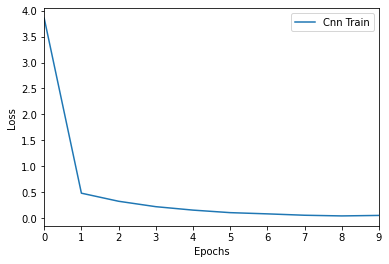

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from visual import *
#from elice_utils import EliceUtils

#elice_utils = EliceUtils()

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)


# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)


"""
1. CNN 모델을 설정합니다.
   분류 모델에 맞게 마지막 레이어의 노드 수는 10개, activation 함수는 'softmax'로 설정합니다.
"""
model = tf.keras.Sequential([
    #입력층
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    #3번 반복해서 특징 추출
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# CNN 모델 구조를 출력합니다.
print(model.summary())

# CNN 모델의 학습 방법을 설정합니다.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',

              metrics = ['accuracy'])

# 학습을 수행합니다.
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 128)


def Visulaize(histories, key='loss'):
    for name, history in histories:
        plt.plot(history.epoch, history.history[key],
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.savefig("plot.png")

# 학습 결과를 출력합니다.
Visulaize([('CNN', history)], 'loss')

# MNIST 분류 CNN 모델 - 평가 및 예측
[실습2]에 이어서 이번 실습에서는 CNN 모델을 평가하고 예측해보겠습니다.

---

Keras에서 CNN 모델의 평가 및 예측을 위해 필요한 함수/메서드

평가 방법

```
model.evaluate(X, Y)
```

evaluate() 메서드는 학습된 모델을 바탕으로 입력한 feature 데이터 X와 label Y의 loss 값과 metrics 값을 출력합니다.  

예측 방법
```python
model.predict_classes(X)

```
X 데이터의 예측 label 값을 출력합니다.

소스의 구조

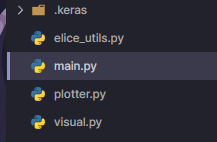

In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import tensorflow as tf
#버전 상이 :: tensorflow.keras --> tensorflow.python.keras 로 바꿈
from tensorflow.python.keras import models
import matplotlib.pyplot as plt

def Plotter(test_images, model):

    img_tensor = test_images[0]
    img_tensor = np.expand_dims(img_tensor, axis=0)

    layer_outputs = [layer.output for layer in model.layers[:6]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(img_tensor)

    layer_names = []
    for layer in model.layers[:6]:
        layer_names.append(layer.name)

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]

        size = layer_activation.shape[1]

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]

                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255.).astype('uint8')

                display_grid[col * size : (col+1) * size, row * size : (row+1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.savefig("plot.png")
        #elice_utils.send_image("plot.png")

    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical
#from elice_utils import EliceUtils
#elice_utils = EliceUtils()

def Visulaize(histories, key='loss'):
    for name, history in histories:
        plt.plot(history.epoch, history.history[key],
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
    plt.savefig("plot.png")
    #elice_utils.send_image("plot.png")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 4, 32)        

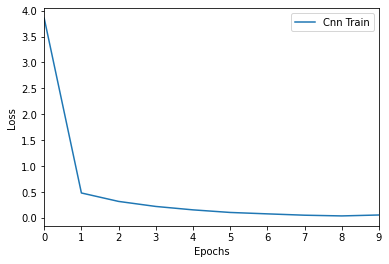

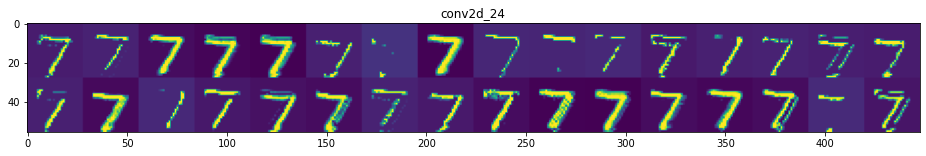

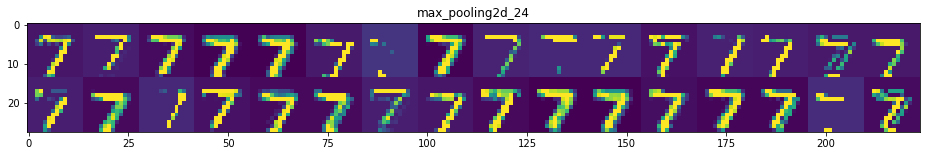

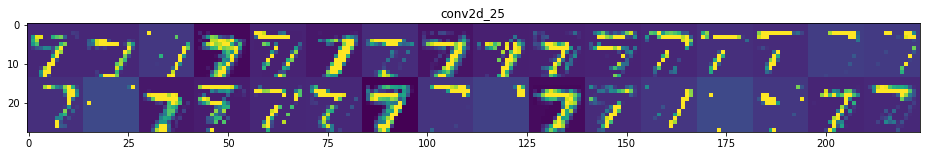

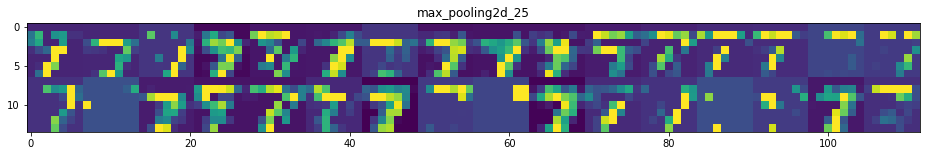

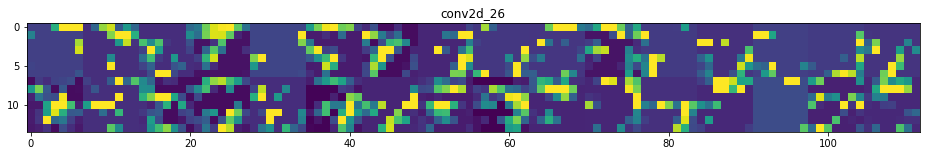

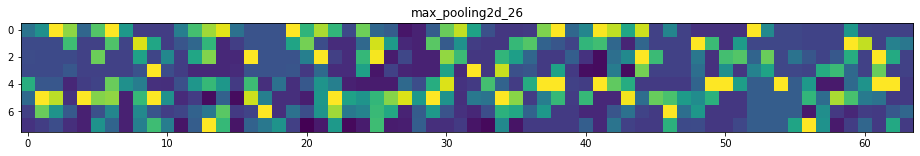

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from visual import *
#from plotter import *
#from elice_utils import EliceUtils

#elice_utils = EliceUtils()

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)


# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)


# CNN 모델을 설정합니다.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# CNN 모델 구조를 출력합니다.
print(model.summary())

# CNN 모델의 학습 방법을 설정합니다.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',

              metrics = ['accuracy'])

# 학습을 수행합니다.
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)


Visulaize([('CNN', history)], 'loss')

"""
1. 평가용 데이터를 활용하여 모델을 평가합니다.
   loss와 accuracy를 계산하고 loss, test_acc에 저장합니다.
"""
loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

"""
2. 평가용 데이터에 대한 예측 결과를 predictions에 저장합니다.
"""
#predictions = model.predict_classes(test_images)
y_prob = model.predict(test_images, verbose=0)
predictions = y_prob.argmax(axis=-1)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('예측한 Test Data 클래스 : ', predictions[:10])

# 평가용 데이터에 대한 레이어 결과를 시각화합니다.
##풀링을 거치면서 사이즈가 줄어들어 해상도가 달라지는 것을 확인할 수 있다.
##이미지속에는 특징에 해당하는 부분만 남아 있다.
Plotter(test_images, model)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from visual import *
#from plotter import *
#from elice_utils import EliceUtils

#elice_utils = EliceUtils()

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)


# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 1000개를 사용합니다.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)


# CNN 모델을 설정합니다.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# CNN 모델 구조를 출력합니다.
print(model.summary())

# CNN 모델의 학습 방법을 설정합니다.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습을 수행합니다.
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

Visulaize([('CNN', history)], 'loss')

"""
1. 평가용 데이터를 활용하여 모델을 평가합니다.
   loss와 accuracy를 계산하고 loss, test_acc에 저장합니다.
"""
loss, test_acc = model.evaluate(None, None, verbose = 2)

"""
2. 평가용 데이터에 대한 예측 결과를 predictions에 저장합니다.
"""
predictions = model.predict_classes(None)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('예측한 Test Data 클래스 : ',predictions[:10])

# 평가용 데이터에 대한 레이어 결과를 시각화합니다.
Plotter(test_images, model)


# MNIST 분류 - MLP vs. CNN
실습 1,2,3에서 MNIST를 CNN을 활용하여 분류해보았습니다.

CNN은 이미지 데이터를 특히 잘 다룰 수 있는 신경망 모델이라고 배웠습니다. 그렇다면, 실제로 MNIST 분류 task를 MLP와 CNN으로 각각 학습하였을 때의 성능 차이를 비교해보겠습니다.

동등한 비교를 위해 CNN의 weight의 수 (52,298개)와 MLP의 weight의 수(52,650)를 비슷하게 설정하겠습니다.

https://studyfield.tistory.com/660

# 지시사항
MLP_model에 MLP 모델을 생성하여 저장합니다. 첫번째 레이어의 출력 차원은 64, 두번째 레이어의 출력차원은 32, 마지막 레이어의 출력 차원은 10으로 합니다. 첫번째와 두번째 레이어의 활성함수는 relu로, 마지막 레이어의 활성함수는 softmax로 합니다.
CNN_model에 CNN 모델을 생성하여 저장합니다. 3개의 convolution 레이어와 2개의 dense 레이어로 구성합니다. 각 convolution layer의 필터 개수는 32, 커널 사이즈는 3 ×\times× 3으로 설정합니다.

다층 퍼셉트론(multi-layer perceptron, MLP)는 퍼셉트론으로 이루어진 층(layer) 여러 개를 순차적으로 붙여놓은 형태입니다. MLP는 정방향 인공신경망(feed-forward deep neural network, FFDNN)이라고 부르기도 합니다.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 500개를 사용합니다.
train_images, train_labels = train_images[:5000].astype(float), train_labels[:5000]
test_images, test_labels = test_images[:500].astype(float), test_labels[:500]

'''
1. 먼저 MLP 모델을 학습해보겠습니다.
'''
print('========== MLP ==========')

# MLP 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀 * 세로픽셀) 형태로 변환합니다.
train_images = tf.cast(tf.reshape(train_images, (5000, -1)) / 256., tf.float32)
train_labels = tf.convert_to_tensor(train_labels)
test_images = tf.cast(tf.reshape(test_images, (500, -1)) / 256., tf.float32)
test_labels = tf.convert_to_tensor(test_labels)

# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# MLP 모델의 학습 방법을 설정합니다.
MLP_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습을 수행합니다.
history = MLP_model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

# MLP 모델 구조를 출력합니다. weight의 수가 52,650개입니다.
MLP_model.summary()

# 평가용 데이터를 활용하여 정확도를 평가합니다.
loss, test_acc = MLP_model.evaluate(test_images, test_labels, verbose = 0)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nMLP Test Loss : {:.4f} | MLP Test Accuracy : {}\n'.format(loss, test_acc))



========== MLP ==========
Epoch 1/10
40/40 - 0s - loss: 1.5219 - accuracy: 0.5792 - 463ms/epoch - 12ms/step
Epoch 2/10
40/40 - 0s - loss: 0.5755 - accuracy: 0.8594 - 97ms/epoch - 2ms/step
Epoch 3/10
40/40 - 0s - loss: 0.3723 - accuracy: 0.9054 - 93ms/epoch - 2ms/step
Epoch 4/10
40/40 - 0s - loss: 0.2947 - accuracy: 0.9226 - 90ms/epoch - 2ms/step
Epoch 5/10
40/40 - 0s - loss: 0.2502 - accuracy: 0.9348 - 94ms/epoch - 2ms/step
Epoch 6/10
40/40 - 0s - loss: 0.2172 - accuracy: 0.9404 - 91ms/epoch - 2ms/step
Epoch 7/10
40/40 - 0s - loss: 0.1915 - accuracy: 0.9510 - 103ms/epoch - 3ms/step
Epoch 8/10
40/40 - 0s - loss: 0.1694 - accuracy: 0.9550 - 93ms/epoch - 2ms/step
Epoch 9/10
40/40 - 0s - loss: 0.1500 - accuracy: 0.9630 - 96ms/epoch - 2ms/step
Epoch 10/10
40/40 - 0s - loss: 0.1432 - accuracy: 0.9600 - 91ms/epoch - 2ms/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense

In [ ]:

'''
2. 다음으로, CNN 모델을 학습해보겠습니다.
'''
print('========== CNN ==========')

# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.reshape(train_images, (5000, 28, 28, 1))
test_images = tf.reshape(test_images, (500, 28, 28, 1))

# CNN 모델을 설정합니다.
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# CNN 모델의 학습 방법을 설정합니다.
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습을 수행합니다.
history = CNN_model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

# CNN 모델 구조를 출력합니다. weight의 수가 52,298개입니다.
CNN_model.summary()

# 평가용 데이터를 활용하여 정확도를 평가합니다.
loss, test_acc = CNN_model.evaluate(test_images, test_labels, verbose = 0)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nCNN Test Loss : {:.4f} | CNN Test Accuracy : {}'.format(loss, test_acc))


========== CNN ==========
Epoch 1/10
40/40 - 1s - loss: 1.5636 - accuracy: 0.5474 - 610ms/epoch - 15ms/step
Epoch 2/10
40/40 - 0s - loss: 0.4062 - accuracy: 0.8748 - 188ms/epoch - 5ms/step
Epoch 3/10
40/40 - 0s - loss: 0.2416 - accuracy: 0.9266 - 173ms/epoch - 4ms/step
Epoch 4/10
40/40 - 0s - loss: 0.1688 - accuracy: 0.9514 - 157ms/epoch - 4ms/step
Epoch 5/10
40/40 - 0s - loss: 0.1437 - accuracy: 0.9576 - 157ms/epoch - 4ms/step
Epoch 6/10
40/40 - 0s - loss: 0.1152 - accuracy: 0.9670 - 155ms/epoch - 4ms/step
Epoch 7/10
40/40 - 0s - loss: 0.0891 - accuracy: 0.9734 - 158ms/epoch - 4ms/step
Epoch 8/10
40/40 - 0s - loss: 0.0871 - accuracy: 0.9740 - 157ms/epoch - 4ms/step
Epoch 9/10
40/40 - 0s - loss: 0.0698 - accuracy: 0.9804 - 157ms/epoch - 4ms/step
Epoch 10/10
40/40 - 0s - loss: 0.0820 - accuracy: 0.9768 - 164ms/epoch - 4ms/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d

Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________

MLP Test Loss : 0.2448 | MLP Test Accuracy : 0.9279999732971191

---

Total params: 52,298
Trainable params: 52,298
Non-trainable params: 0
_________________________________________________________________

CNN Test Loss : 0.0629 | CNN Test Accuracy : 0.9800000190734863

In [ ]:
## 배포용 코드

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

# MNIST 데이터 세트를 불러옵니다.
mnist = tf.keras.datasets.mnist

# MNIST 데이터 세트를 Train set과 Test set으로 나누어 줍니다.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train 데이터 5000개와 Test 데이터 500개를 사용합니다.
train_images, train_labels = train_images[:5000].astype(float), train_labels[:5000]
test_images, test_labels = test_images[:500].astype(float), test_labels[:500]

'''
1. 먼저 MLP 모델을 학습해보겠습니다.
'''
print('========== MLP ==========')

# MLP 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀 * 세로픽셀) 형태로 변환합니다.
train_images = tf.cast(tf.reshape(train_images, (5000, -1)) / 256., tf.float32)
train_labels = tf.convert_to_tensor(train_labels)
test_images = tf.cast(tf.reshape(test_images, (500, -1)) / 256., tf.float32)
test_labels = tf.convert_to_tensor(test_labels)

# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(None, activation = 'None'),
    tf.keras.layers.Dense(None, activation = 'None'),
    tf.keras.layers.Dense(None, activation = 'None')
])

# MLP 모델의 학습 방법을 설정합니다.
MLP_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습을 수행합니다.
history = MLP_model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

# MLP 모델 구조를 출력합니다. weight의 수가 52,650개입니다.
MLP_model.summary()

# 평가용 데이터를 활용하여 정확도를 평가합니다.
loss, test_acc = MLP_model.evaluate(test_images, test_labels, verbose = 0)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nMLP Test Loss : {:.4f} | MLP Test Accuracy : {}\n'.format(loss, test_acc))

'''
2. 다음으로, CNN 모델을 학습해보겠습니다.
'''
print('========== CNN ==========')

# CNN 모델의 입력으로 사용할 수 있도록 (샘플개수, 가로픽셀, 세로픽셀, 1) 형태로 변환합니다.
train_images = tf.reshape(train_images, (5000, 28, 28, 1))
test_images = tf.reshape(test_images, (500, 28, 28, 1))

# CNN 모델을 설정합니다.
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = None, kernel_size = (None,None), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = None, kernel_size = (None,None), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = None, kernel_size = (None,None), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# CNN 모델의 학습 방법을 설정합니다.
CNN_model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# 학습을 수행합니다.
history = CNN_model.fit(train_images, train_labels, epochs = 10, batch_size = 128, verbose = 2)

# CNN 모델 구조를 출력합니다. weight의 수가 52,298개입니다.
CNN_model.summary()

# 평가용 데이터를 활용하여 정확도를 평가합니다.
loss, test_acc = CNN_model.evaluate(test_images, test_labels, verbose = 0)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nCNN Test Loss : {:.4f} | CNN Test Accuracy : {}'.format(loss, test_acc))



# 자연어 처리

자연어 전처리 > 단어 표현 (워드 임베딩) > 딥러닝 모델 적용


# 영화 리뷰 긍정/부정 분류 RNN 모델 - 데이터 전 처리
이번 실습에서는 영화 리뷰 데이터를 바탕으로 감정 분석을 하는 모델을 학습 시켜 보겠습니다. 영화 리뷰와 같은 자연어 자료는 곧 단어의 연속적인 배열로써, 시계열 자료라고 볼 수 있습니다. 즉, 시계열 자료(연속된 단어)를 이용해 리뷰에 내포된 감정(긍정, 부정)을 예측하는 분류기를 만들어 보겠습니다.

데이터셋은 IMDB 영화 리뷰 데이터 셋을 사용합니다. 훈련용 5,000개와 테스트용 1,000개로 이루어져 있으며, 레이블은 긍정/부정으로 두 가지입니다. 우선 자연어 데이터를 RNN 모델의 입력으로 사용할 수 있도록 데이터 전 처리를 수행해보겠습니다.

---
**RNN을 위한 자연어 데이터 전 처리**

RNN의 입력으로 사용하기 위해서는 자연어 데이터는 토큰화 및 여러 가지의 데이터 처리가 필요합니다. 아래와 같이 자연어 데이터가 준비되어 있다면 마지막으로 패딩을 수행하여 데이터의 크기를 통일해야합니다.

첫 번째 데이터 시퀀스:
image

단어 사전:
image
```
sequence.pad_sequences(data, maxlen=300, padding='post')
```

:data 시퀀스의 크기가 maxlen인자보다 작으면 그 크기에 맞게 패딩을 추가합니다.

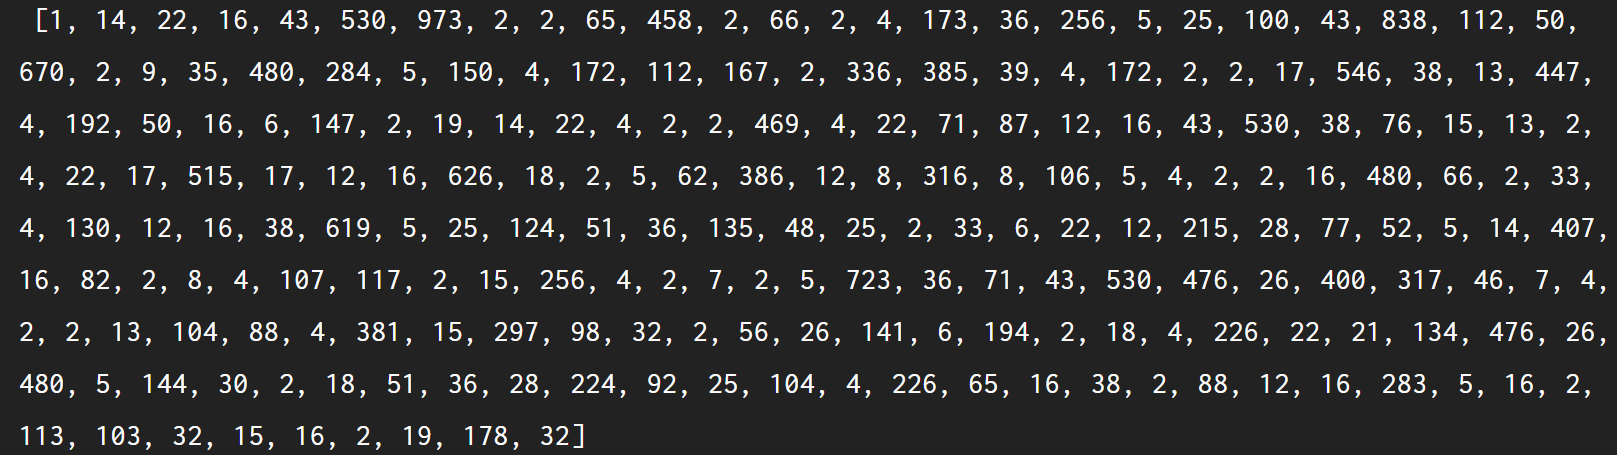

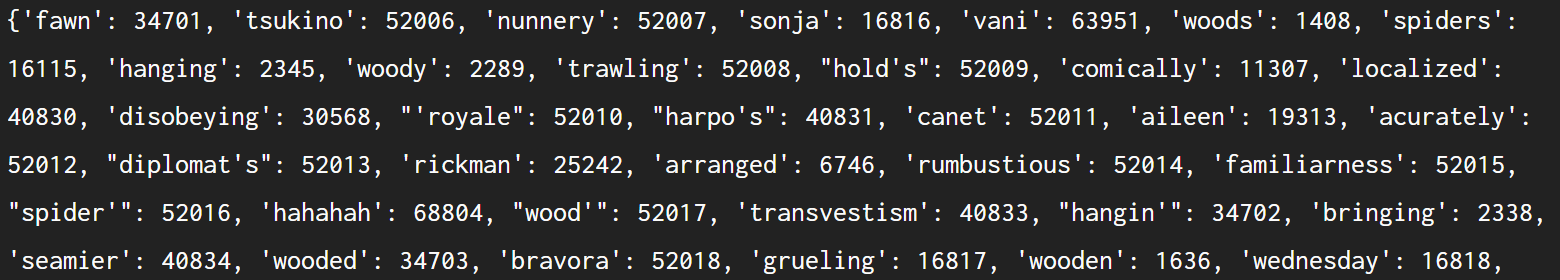

# 지시사항
인덱스로 변환된 X_train, X_test 시퀀스에 패딩을 수행하고 각각 X_train, X_test에 저장합니다.
시퀀스 최대 길이는 300으로 설정합니다.

In [ ]:
import json
import numpy as np
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# 데이터를 불러오고 전처리하는 함수입니다.

n_of_training_ex = 5000
n_of_testing_ex = 1000

PATH = "./data/"

def imdb_data_load():

    X_train = np.load(PATH + "X_train.npy")[:n_of_training_ex]
    y_train = np.load(PATH + "y_train.npy")[:n_of_training_ex]
    X_test = np.load(PATH + "X_test.npy")[:n_of_testing_ex]
    y_test = np.load(PATH + "y_test.npy")[:n_of_testing_ex]

    # 단어 사전 불러오기
    with open(PATH+"imdb_word_index.json") as f:
        word_index = json.load(f)
    # 인덱스 -> 단어 방식으로 딕셔너리 설정
    inverted_word_index = dict((i, word) for (word, i) in word_index.items())
    # 인덱스를 바탕으로 문장으로 변환
    decoded_sequence = " ".join(inverted_word_index[i] for i in X_train[0])


    print("첫 번째 X_train 데이터 샘플 문장: \n",decoded_sequence)
    print("\n첫 번째 X_train 데이터 샘플 토큰 인덱스 sequence: \n",X_train[0])
    print("첫 번째 X_train 데이터 샘플 토큰 시퀀스 길이: ", len(X_train[0]))
    print("첫 번째 y_train 데이터: ",y_train[0])

    return X_train, y_train, X_test, y_test

In [ ]:
import json
import numpy as np
import tensorflow as tf
#import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 학습용 및 평가용 데이터를 불러오고 샘플 문장을 출력합니다.
#X_train, y_train, X_test, y_test = data_process.imdb_data_load()
X_train, y_train, X_test, y_test = imdb_data_load()

"""
1. 인덱스로 변환된 X_train, X_test 시퀀스에 패딩을 수행하고 각각 X_train, X_test에 저장합니다.
   시퀀스 최대 길이는 300으로 설정합니다.
"""
X_train = sequence.pad_sequences(X_train, maxlen=300, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=300, padding='post')

print("\n패딩을 추가한 첫 번째 X_train 데이터 샘플 토큰 인덱스 sequence: \n",X_train[0])

EOFError: ignored

imdb_data_load()  에서 오류 발생
data 폴더에 파일을 업로드 했음
파일의 내용도 비어있지 않음을 확인함
???

# 영화 리뷰 긍정/부정 분류 RNN 모델 - 모델 학습
[실습5]에서 전 처리한 데이터를 바탕으로 RNN 모델을 구현하고 학습을 수행해보겠습니다.
---

**Keras에서 RNN 모델을 만들기 위해 필요한 함수/라이브러리**

일반적으로 RNN 모델은 입력층으로 Embedding 레이어를 먼저 쌓고, RNN 레이어를 몇 개 쌓은 다음, 이후 Dense 레이어를 더 쌓아 완성합니다.

**임베딩 레이어**
```
tf.keras.layers.Embedding(input_dim, output_dim, input_length)
```

: 들어온 문장을 단어 임베딩(embedding)하는 레이어

* input_dim: 들어올 단어의 개수

* output_dim: 결과로 나올 임베딩 벡터의 크기(차원)

* input_length: 들어오는 단어 벡터의 크기


**RNN 레이어**
```
tf.keras.layers.SimpleRNN(units)
```
: 단순 RNN 레이어

units: 레이어의 노드 수

# 지시사항
RNN 모델을 구현합니다.
임베딩 레이어 다음으로 SimpleRNN을 사용하여 RNN 레이어를 쌓고 노드의 개수는 5개로 설정합니다.

In [ ]:
import json
import numpy as np
import tensorflow as tf
import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

# 학습용 및 평가용 데이터를 불러오고 샘플 문장을 출력합니다.
X_train, y_train, X_test, y_test = data_process.imdb_data_load()

max_review_length = 300

# 패딩을 수행합니다.
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length, padding='post')

#출력하려는 벡터의 길이
embedding_vector_length = 32

"""
1. 모델을 구현합니다.
   임베딩 레이어 다음으로 `SimpleRNN`을 사용하여 RNN 레이어를 쌓고 노드의 개수는 5개로 설정합니다.
   Dense 레이어는 0, 1 분류이기에 노드를 1개로 하고 activation을 'sigmoid'로 설정되어 있습니다.
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, embedding_vector_length, input_length = max_review_length),
    tf.keras.layers.SimpleRNN(5),
    tf.keras.layers.Dense(1, activation='sigmoid')  #긍부정 예측 바이너리이므로 1, 멀티클래스일때는 softmax
    ])

# 모델을 확인합니다.
print(model.summary())

# 학습 방법을 설정합니다.0과 1형태의 바이너리인 경우 바이너리크로스엔트로피 사용
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습을 수행합니다.
#epochs 를 점차늘리면 accuracy가 늘어난다
model_history = model.fit(X_train, y_train, epochs = 3, verbose = 2)

In [ ]:
# 에포크 3일때

Train on 5000 samples
Epoch 1/3
5000/5000 - 12s - loss: 0.6936 - accuracy: 0.5048
Epoch 2/3
5000/5000 - 12s - loss: 0.6811 - accuracy: 0.5760
Epoch 3/3
5000/5000 - 12s - loss: 0.6664 - accuracy: 0.6102

/* 코드 실행이 완료되었습니다! */

In [ ]:
# 에포크 20일때

5000/5000 - 10s - loss: 0.4933 - accuracy: 0.7658
Epoch 18/20
5000/5000 - 10s - loss: 0.4599 - accuracy: 0.7902
Epoch 19/20
5000/5000 - 10s - loss: 0.4366 - accuracy: 0.8098
Epoch 20/20
5000/5000 - 11s - loss: 0.4235 - accuracy: 0.8196

# 영화 리뷰 긍정/부정 분류 RNN 모델 - 평가 및 예측
[실습6]에 이어서 이번 실습에서는 RNN 모델을 평가하고 예측해보겠습니다.
---
**Keras에서 RNN 모델의 평가 및 예측을 위해 필요한 함수/메서드**

평가 방법
```
model.evaluate(X, Y)
```

evaluate() 메서드는 학습된 모델을 바탕으로 입력한 feature 데이터 X와 label Y의 loss 값과 metrics 값을 출력합니다.

예측 방법
```python
model.predict(X)

```
X 데이터의 예측 label 값을 출력합니다.

# 지시사항
evaluate 메서드를 사용하여 평가용 데이터를 활용하여 모델을 평가합니다.

loss와 accuracy를 계산하고 loss, test_acc에 저장합니다.
predict 메서드를 사용하여 평가용 데이터에 대한 예측 결과를 predictions에 저장합니다.

In [ ]:
import json
import numpy as np
import tensorflow as tf
import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

# 학습용 및 평가용 데이터를 불러오고 샘플 문장을 출력합니다.
X_train, y_train, X_test, y_test = data_process.imdb_data_load()

max_review_length = 300

# 패딩을 수행합니다.
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length, padding='post')


embedding_vector_length = 32


# 모델을 구현합니다.
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, embedding_vector_length, input_length = max_review_length),
    tf.keras.layers.SimpleRNN(5),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 모델을 확인합니다.
print(model.summary())

# 학습 방법을 설정합니다.
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습을 수행합니다.
model_history = model.fit(X_train, y_train, epochs = 5, verbose = 2)

"""
1. 평가용 데이터를 활용하여 모델을 평가합니다.
   loss와 accuracy를 계산하고 loss, test_acc에 저장합니다.
"""
loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

"""
2. 평가용 데이터에 대한 예측 결과를 predictions에 저장합니다.
"""
predictions = model.predict(X_test)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('예측한 Test Data 클래스 : ',1 if predictions[0]>=0.5 else 0)

# 중요한 것만 기억하는 RNN - LSTM
실습 5,6,7에서 기본적인 RNN 모델을 실습해보았습니다.

RNN 모델은 언어 데이터와 같은 시계열 데이터를 잘 다룰 수 있는 모델입니다. 그러나, RNN의 가장 큰 단점 중 하나는 장기의존성 문제 (long-term dependency problem, short-term memory problem, vanishing gradient problem) 입니다.

어려워 보일 수 있지만, 쉽게 얘기하자면 단순 RNN은 단기 기억은 잘 할 수 있지만, 장기 기억에 어려움을 겪는다는 것입니다. 그래서 입력 데이터의 길이가 길어지면, 초기에 입력되었던 데이터가 출력에 거의 반영되지 않는 문제가 발생합니다.



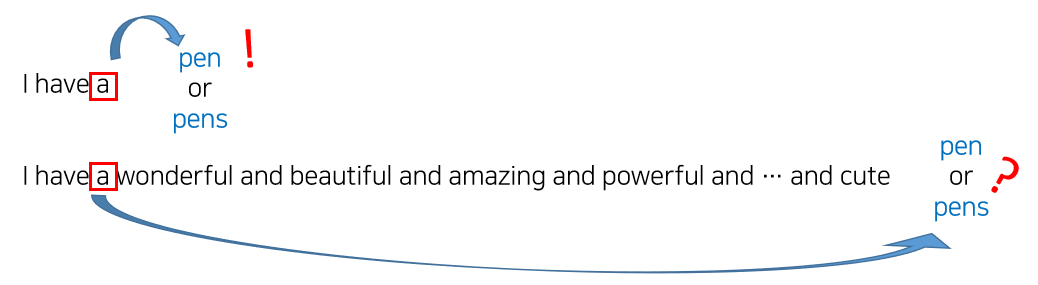

예를 들어, 위의 그림처럼 어떤 문장이 입력되고, 다음으로 입력될 단어를 문법에 맞게 예측하여야 하는 task를 생각해봅시다. RNN 모델은 I have a pen 과 같이 짧은 문장에서는 pens가 아니라 pen이 정답인 것을 쉽게 맞출 수 있습니다. 그러나, I have a wonderful and beautiful and powerful and ... and amazing pen 과 같이 긴 문장이 올 때에는 pen이 정답인지 pens가 정답인지 맞추기 어렵습니다.

이런 문제를 완화하고자 고안된 모델이 LSTM (long short-term memory) 모델입니다. 간단한 RNN 모델은 모든 입력 sequence를 동등하게 취급하는 반면, LSTM은 입력값이 중요한지 중요하지 않은지를 판단합니다. 그래서, 중요하지 않은 정보는 과감하게 버리고, 중요한 정보를 집중해서 기억함으로써 길이가 긴 데이터를 더 잘 다룰 수 있습니다.

LSTM 모델은 단순 RNN 모델과 마찬가지로 keras 라이브러리를 활용하여 쉽게 구현할 수 있습니다.

```
model = tf.keras.models.Sequential([
    ... ,
    tf.keras.layers.LSTM( N ),
    ...
    ])
    ```

# 지시사항
오른쪽 코드에 None으로 표시된 부분을 적절히 수정해보세요. LSTM 모델을 생성하고, 학습하고, compile하고, 평가하는 부분이 None으로 되어 있습니다.

In [ ]:
import json
import numpy as np
import tensorflow as tf
import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# 동일한 실행 결과 확인을 위한 코드입니다.
np.random.seed(123)
tf.random.set_seed(123)

'''
1. 데이터를 불러옵니다.
'''

# 학습용 및 평가용 데이터를 불러오고 샘플 문장을 출력합니다.
X_train, y_train, X_test, y_test = data_process.imdb_data_load()

max_review_length = 300

# 패딩을 수행합니다.
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length, padding='post')


embedding_vector_length = 128

'''
2. SimpleRNN 모델을 학습해봅니다.
'''

# SimpleRNN 모델을 구현합니다.
simpleRNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, embedding_vector_length, input_length = max_review_length),
    tf.keras.layers.SimpleRNN(5),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 학습 방법을 설정합니다.
simpleRNN_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습을 수행합니다.
simpleRNN_model.fit(X_train, y_train, epochs = 5, verbose = 2)

# 평가용 데이터를 활용하여 모델을 평가합니다
loss, test_acc = simpleRNN_model.evaluate(X_test, y_test, verbose = 0)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nSimpleRNN Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))

'''
3. LSTM 모델을 학습해봅니다.
'''

# LSTM 모델을 구현합니다.
LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, embedding_vector_length, input_length = max_review_length),
    tf.keras.layers.None(5),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# 학습 방법을 설정합니다.
LSTM_model.None(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습을 수행합니다.
LSTM_model.None(X_train, y_train, epochs = 5, verbose = 2)

# 평가용 데이터를 활용하여 모델을 평가합니다
loss, test_acc = LSTM_model.None(X_test, y_test, verbose = 0)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nLSTM Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
